### Importings

In [8]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
data=pd.read_csv('D:\AWORK\Datasets\End_species.csv')

In [3]:
data

,Unnamed: 0,Scientifc Name,Common Name,Conservation Status
0,0,Loxodonta africana,African Elephant,NaN
1,1,NaN,African forest elephant,Critically Endangered
2,2,Loxodonta africana africana,African savanna elephant,Endangered
3,3,Lycaon pictus,African Wild Dog,Endangered
4,4,Thunnus alalunga,Albacore Tuna,Near Threatened
...,...,...,...,...
92,92,"Balaenoptera, Balaena, Eschrichtius, and Eubalaen",Whale,Endangered
93,93,Rhincodon typus,Whale Shark,Endangered
94,94,Ceratotherium simum,White Rhino,Near Threatened
95,95,Neophocaena asiaeorientalis ssp. asiaeorientalis,Yangtze Finless Porpoise,Critically Endangered


In [10]:
data.isna().sum()

Unnamed: 0              0
Scientifc Name         10
Common Name             0
Conservation Status    15
dtype: int64

In [12]:
data.isna().sum().sum()

25

### Data cleaning 

In [19]:
#removing unnamed:0 column as it is unnecessary 

In [17]:
data =data.drop(columns=['Unnamed: 0'])

In [18]:
data.head()

,Scientifc Name,Common Name,Conservation Status
0,Loxodonta africana,African Elephant,NaN
1,NaN,African forest elephant,Critically Endangered
2,Loxodonta africana africana,African savanna elephant,Endangered
3,Lycaon pictus,African Wild Dog,Endangered
4,Thunnus alalunga,Albacore Tuna,Near Threatened


In [ ]:
#dropping all the rows with 

In [25]:
data['Scientifc Name'].head()

0             Loxodonta africana
1                            NaN
2    Loxodonta africana africana
3                  Lycaon pictus
4               Thunnus alalunga
Name: Scientifc Name, dtype: object

In [32]:
data =data.dropna(subset=['Scientifc Name','Common Name']).reset_index()

In [33]:
data

,index,Scientifc Name,Common Name,Conservation Status
0,0,Loxodonta africana,African Elephant,NaN
1,2,Loxodonta africana africana,African savanna elephant,Endangered
2,3,Lycaon pictus,African Wild Dog,Endangered
3,4,Thunnus alalunga,Albacore Tuna,Near Threatened
4,5,Scientific Name Inia geoffrensis,Amazon River Dolphin,NaN
...,...,...,...,...
82,92,"Balaenoptera, Balaena, Eschrichtius, and Eubalaen",Whale,Endangered
83,93,Rhincodon typus,Whale Shark,Endangered
84,94,Ceratotherium simum,White Rhino,Near Threatened
85,95,Neophocaena asiaeorientalis ssp. asiaeorientalis,Yangtze Finless Porpoise,Critically Endangered


In [37]:
data=data.drop(columns=['index']) 

In [155]:
#dropped the index column 

In [38]:
data

,Scientifc Name,Common Name,Conservation Status
0,Loxodonta africana,African Elephant,NaN
1,Loxodonta africana africana,African savanna elephant,Endangered
2,Lycaon pictus,African Wild Dog,Endangered
3,Thunnus alalunga,Albacore Tuna,Near Threatened
4,Scientific Name Inia geoffrensis,Amazon River Dolphin,NaN
...,...,...,...
82,"Balaenoptera, Balaena, Eschrichtius, and Eubalaen",Whale,Endangered
83,Rhincodon typus,Whale Shark,Endangered
84,Ceratotherium simum,White Rhino,Near Threatened
85,Neophocaena asiaeorientalis ssp. asiaeorientalis,Yangtze Finless Porpoise,Critically Endangered


### Data Preprocessing 

In [40]:
# creating an updated dataset with 2 new features 

In [45]:
df=pd.DataFrame(data)
csv_file='Species.csv'
df.to_csv(csv_file,index=False )

In [46]:

# Loading the dataset
file_path = 'Species.csv' 
wildlife_df = pd.read_csv(file_path)

# Defining a function to assign simplified geographical locations
def location(common_name):
    if isinstance(common_name, str):
        common_name_lower = common_name.lower()
        if "arctic" in common_name_lower or "polar" in common_name_lower or "penguin" in common_name_lower:
            return "Arctic"
        elif "lion" in common_name_lower or "tiger" in common_name_lower or "jungle" in common_name_lower:
            return "Jungle"
        elif "whale" in common_name_lower or "dolphin" in common_name_lower or "tuna" in common_name_lower or "fish" in common_name_lower or "ocean" in common_name_lower:
            return "Ocean"
        elif "elephant" in common_name_lower or "savanna" in common_name_lower:
            return "Savannah"
        elif "dog" in common_name_lower or "wolf" in common_name_lower or "fox" in common_name_lower or "bear" in common_name_lower or "eagle" in common_name_lower or "forest" in common_name_lower:
            return "Forest"
        else:
            return "Unknown"
    else:
        return "Unknown"

# Defining a function to assign endangerment level
def endangerment_level(status):
    if isinstance(status, str):
        status_lower = status.lower()
        if "least concern" in status_lower:
            return 1
        elif "near threatened" in status_lower:
            return 2
        elif "vulnerable" in status_lower:
            return 3
        elif "endangered" in status_lower:
            return 4
        elif "critically endangered" in status_lower:
            return 5
        else:
            return "Unknown"
    else:
        return "Unknown"

# Applying into updated dataset
wildlife_df['Geographical Location'] = wildlife_df['Common Name'].apply(location)
wildlife_df['Endangerment Level'] = wildlife_df['Conservation Status'].apply(endangerment_level)


updated_file_path = 'Updated_World_Wildlife_Species.csv'
wildlife_df.to_csv(updated_file_path, index=False)


In [4]:
df=pd.read_csv('Updated_World_Wildlife_Species.csv')

In [5]:
df

,Scientifc Name,Common Name,Conservation Status,Geographical Location,Endangerment Level
0,Loxodonta africana,African Elephant,NaN,Savannah,Unknown
1,Loxodonta africana africana,African savanna elephant,Endangered,Savannah,4
2,Lycaon pictus,African Wild Dog,Endangered,Forest,4
3,Thunnus alalunga,Albacore Tuna,Near Threatened,Ocean,2
4,Scientific Name Inia geoffrensis,Amazon River Dolphin,NaN,Ocean,Unknown
...,...,...,...,...,...
82,"Balaenoptera, Balaena, Eschrichtius, and Eubalaen",Whale,Endangered,Ocean,4
83,Rhincodon typus,Whale Shark,Endangered,Ocean,4
84,Ceratotherium simum,White Rhino,Near Threatened,Unknown,2
85,Neophocaena asiaeorientalis ssp. asiaeorientalis,Yangtze Finless Porpoise,Critically Endangered,Unknown,4


In [51]:
#our data has been ready now 

### Visualisation

#### Understanding how species are distributed across different geographical locations (e.g., Forest, Savannah, Ocean, Arctic, Jungle).

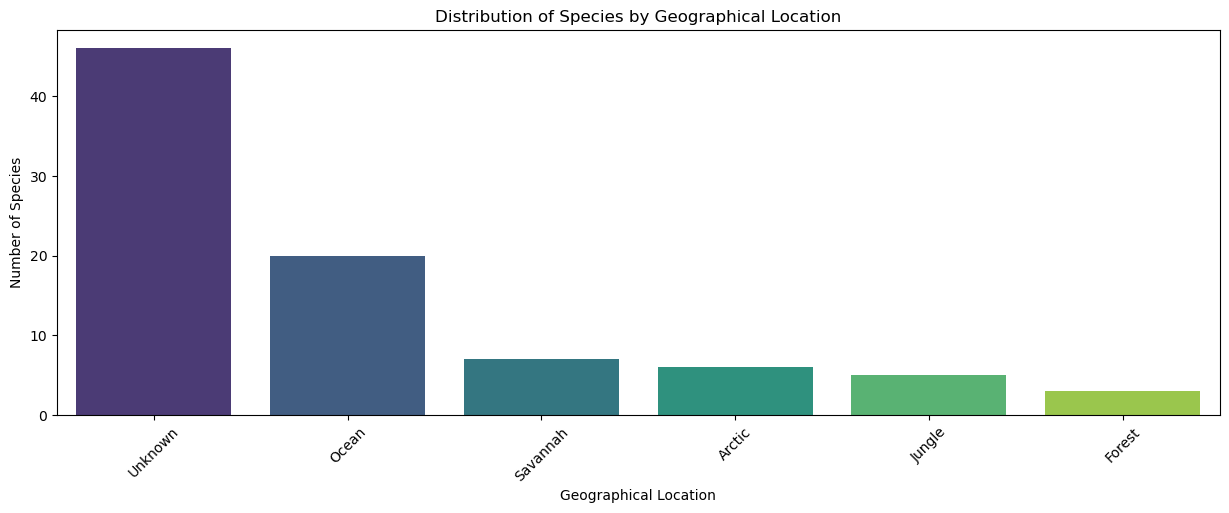

In [152]:
location_counts = df['Geographical Location'].value_counts()

plt.figure(figsize=(15, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
plt.title('Distribution of Species by Geographical Location')
plt.xlabel('Geographical Location')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()

In [63]:
# from the chart we have seen many categories have unknown geographical location which means they can be endangered more than any other 
#due to reason their locations are unknown this might me be because they live in that harsh condition 

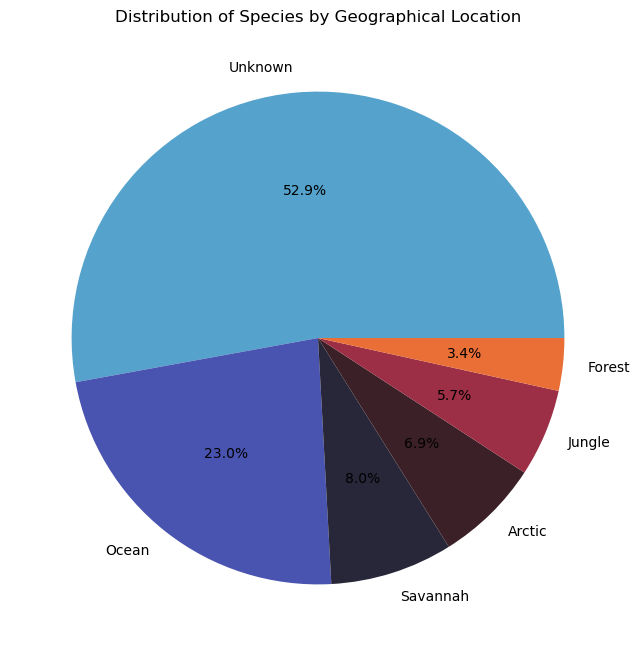

In [11]:
location_counts = df['Geographical Location'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', colors=sns.color_palette("icefire"))
plt.title('Distribution of Species by Geographical Location')
plt.show()

#### Analyzing the distribution of species across different conservation statuses (e.g., Critically Endangered, Endangered).

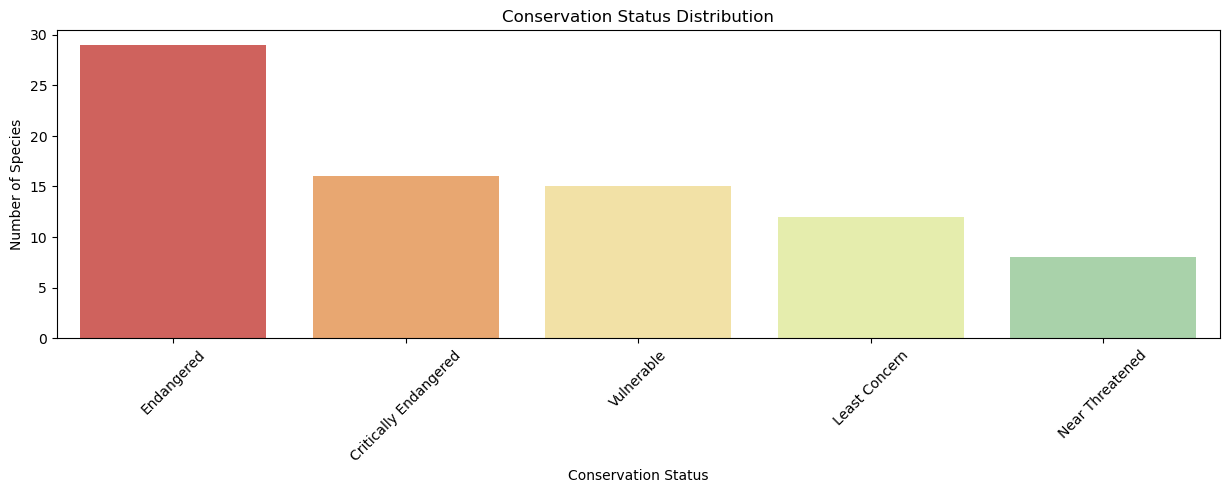

In [151]:
status_counts = df['Conservation Status'].value_counts()

plt.figure(figsize=(15,4))
sns.color_palette("Spectral")
sns.barplot(x=status_counts.index, y=status_counts.values , palette = sns.color_palette("Spectral"))
plt.title('Conservation Status Distribution')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()

C:\Users\dhruv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


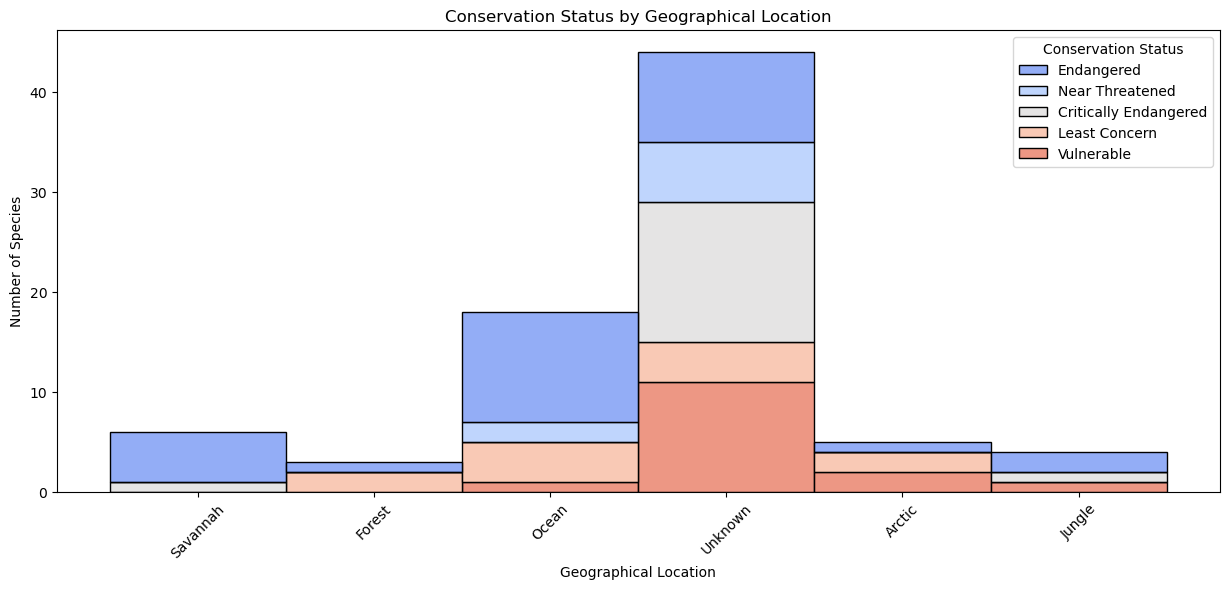

In [7]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Geographical Location', hue='Conservation Status',multiple='stack',  palette='coolwarm')
plt.title('Conservation Status by Geographical Location')
plt.xlabel('Geographical Location')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()

#### Assess the average endangerment level across different geographical locations.

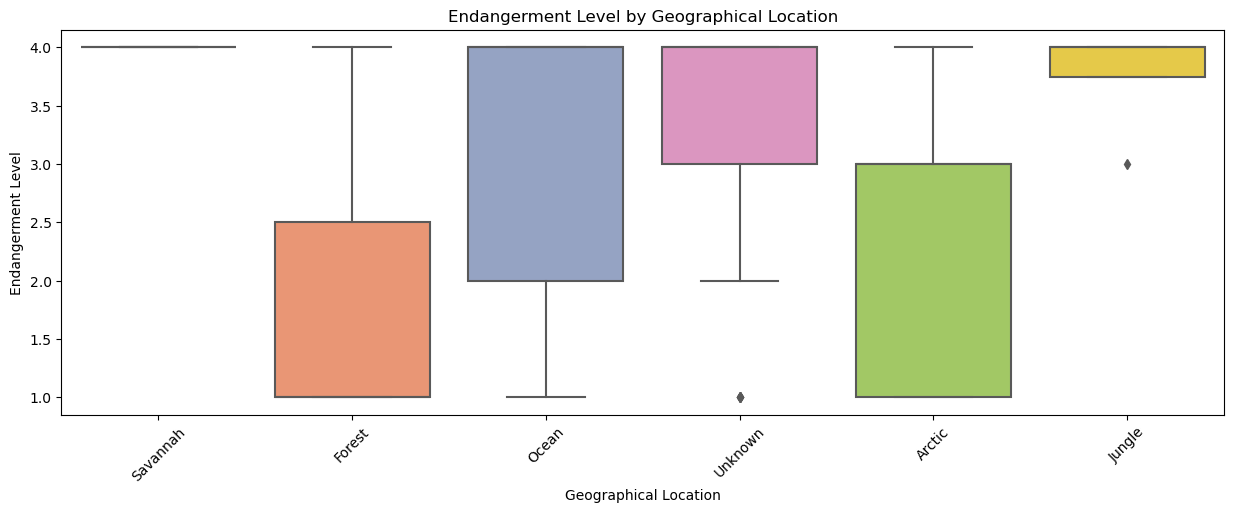

In [143]:
df['Endangerment Level'] = pd.to_numeric(df['Endangerment Level'], errors='coerce')
df['Geographical Location'] = df['Geographical Location'].astype(str)
plt.figure(figsize=(15, 5))
sns.boxplot(x='Geographical Location', y='Endangerment Level', data=df, palette="Set2")
plt.title('Endangerment Level by Geographical Location')
plt.xlabel('Geographical Location')
plt.ylabel('Endangerment Level')
plt.xticks(rotation=45)
plt.show()

#### Correlation Between Endangerment Level and Location

In [85]:
# Creatting a pivot table for correlation analysis
df['Endangerment Level'] = pd.to_numeric(df['Endangerment Level'], errors='coerce')
pivot_table = df.pivot_table(index='Geographical Location', values='Endangerment Level', aggfunc=np.mean)
pivot_table

C:\Users\dhruv\AppData\Local\Temp\ipykernel_77676\3704210470.py:3: FutureWarning: The provided callable <function mean at 0x000001ED45E4A160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = df.pivot_table(index='Geographical Location', values='Endangerment Level', aggfunc=np.mean)


,Endangerment Level
Geographical Location,
Arctic,2.400000
Forest,2.000000
Jungle,3.750000
Ocean,3.055556
Savannah,4.000000
Unknown,3.204545


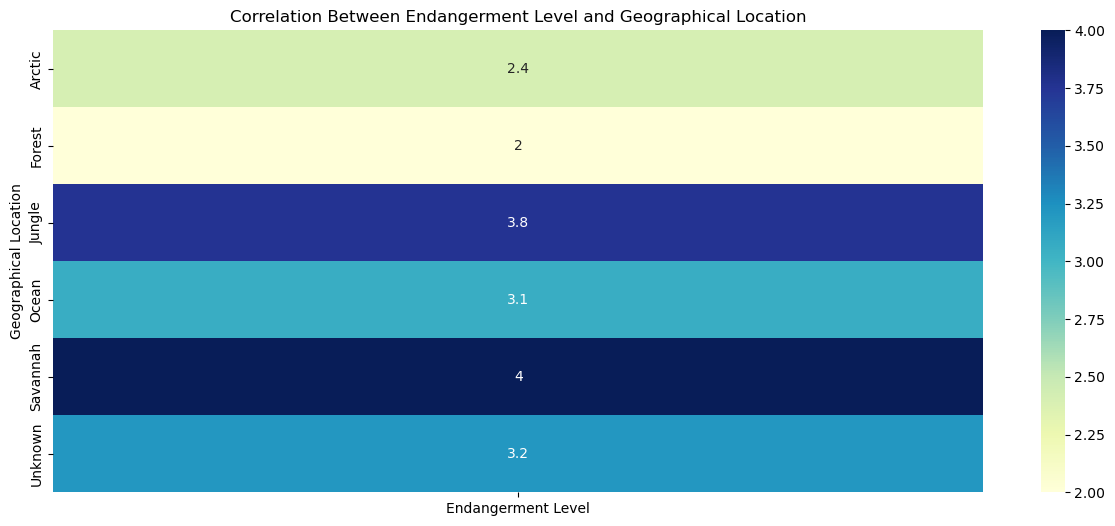

In [141]:
plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Correlation Between Endangerment Level and Geographical Location')
plt.show()

####  Measuring species diversity in each geographical location.

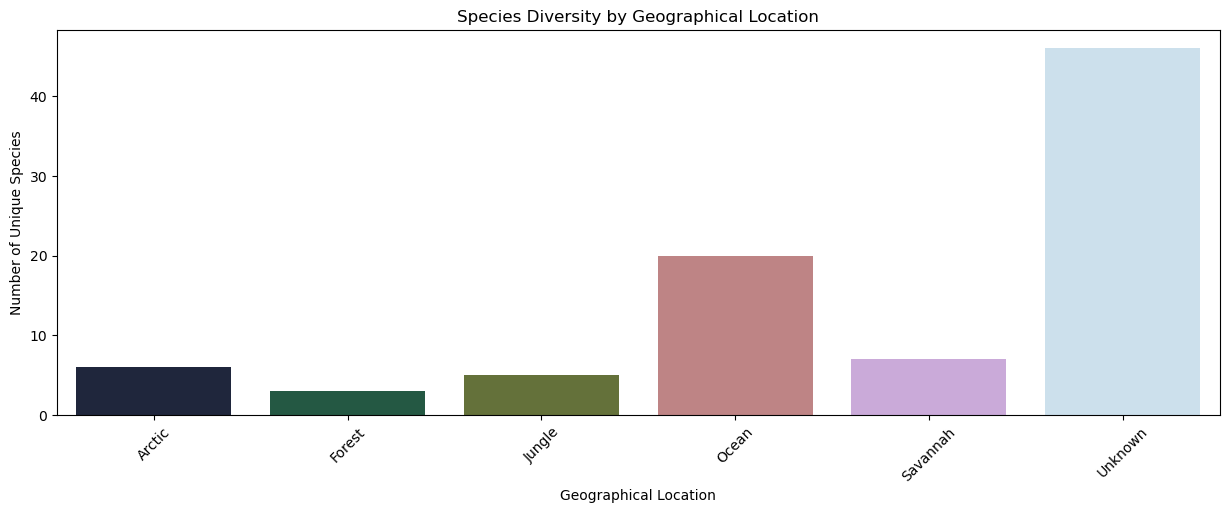

In [140]:
species_counts = df.groupby('Geographical Location')['Common Name'].nunique()

plt.figure(figsize=(15, 5))
sns.barplot(x=species_counts.index, y=species_counts.values, palette="cubehelix")
plt.title('Species Diversity by Geographical Location')
plt.xlabel('Geographical Location')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=45)
plt.show()

#### Comparing how the level of endangerment varies among different geographical regions.

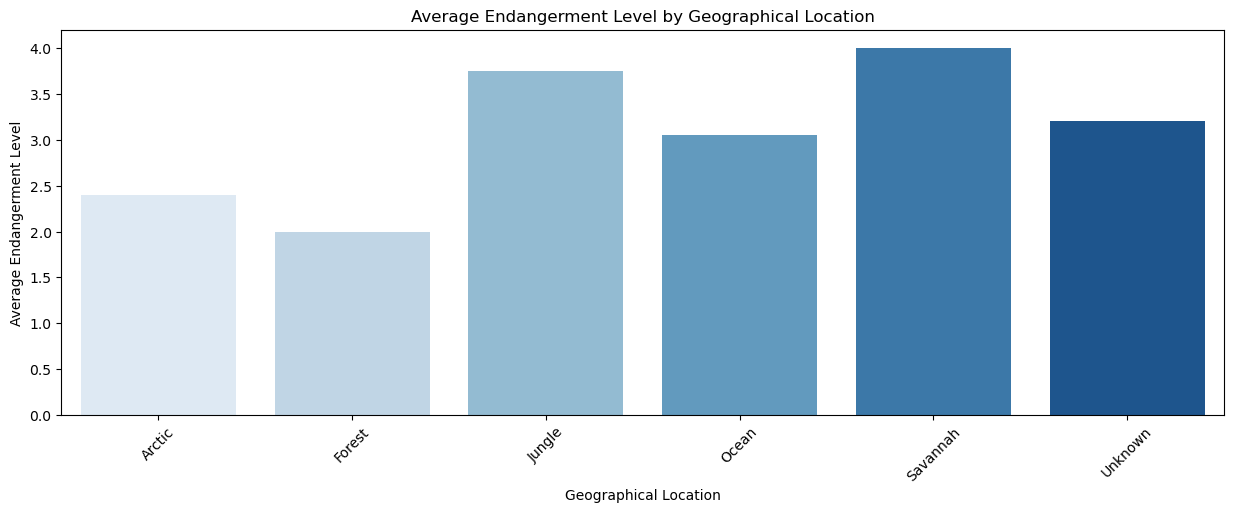

In [144]:
avg_endangerment = df.groupby('Geographical Location')['Endangerment Level'].mean()

plt.figure(figsize=(15, 5))
sns.barplot(x=avg_endangerment.index, y=avg_endangerment.values, palette="Blues")
plt.title('Average Endangerment Level by Geographical Location')
plt.xlabel('Geographical Location')
plt.ylabel('Average Endangerment Level')
plt.xticks(rotation=45)
plt.show()

#### Distribution of Species Count by Endangerment Level

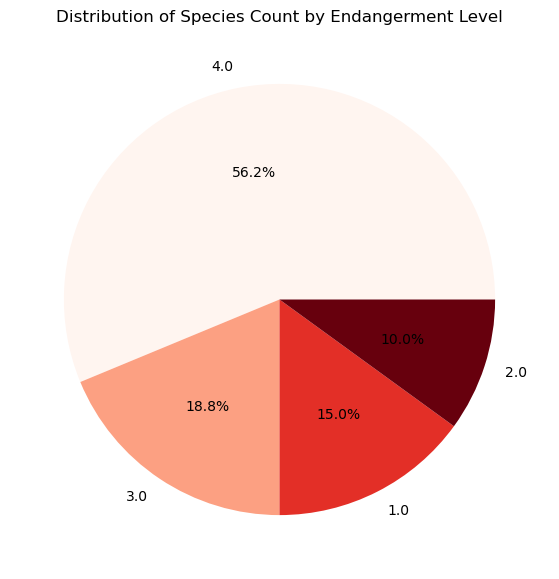

In [136]:
species_counts = df['Endangerment Level'].value_counts()

plt.figure(figsize=(8, 7))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', colors=plt.cm.Reds(np.linspace(0, 1, len(species_counts))))
plt.title('Distribution of Species Count by Endangerment Level')
plt.show()

#### Distribution of Species by Geographical Location

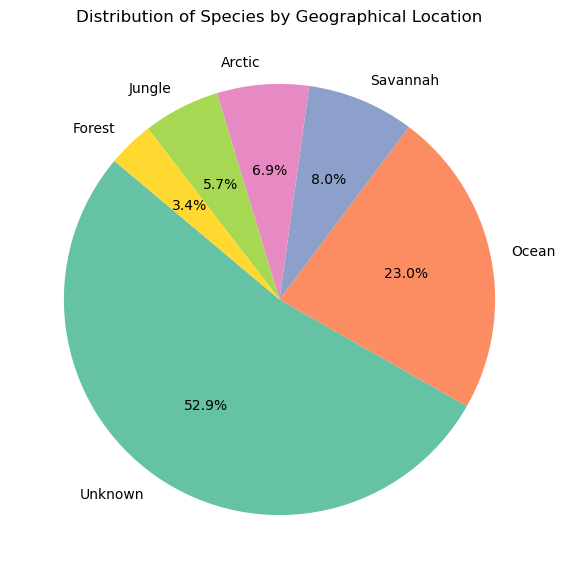

In [138]:
species_distribution = df['Geographical Location'].value_counts()

plt.figure(figsize=(8, 7))
plt.pie(species_distribution, labels=species_distribution.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(species_distribution))), startangle=140)
plt.title('Distribution of Species by Geographical Location')
plt.show()

#### subplotting the above figures 

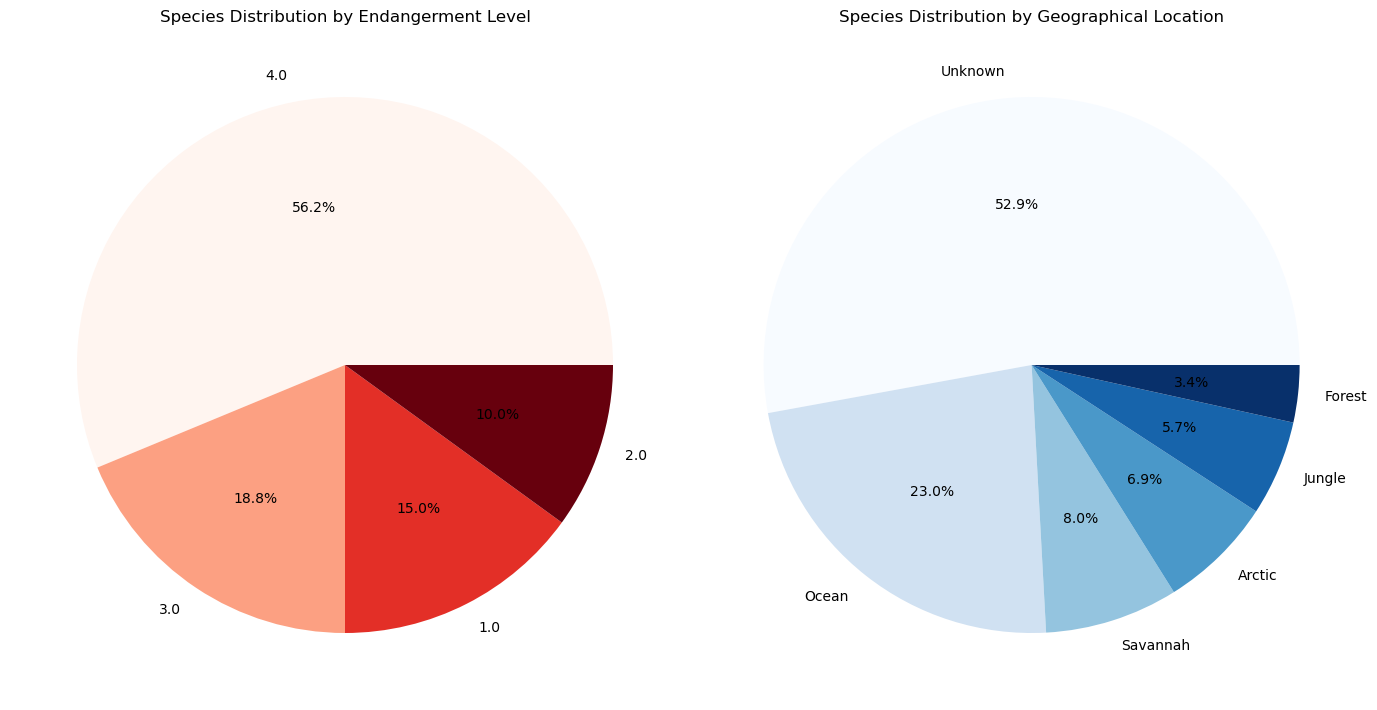

In [153]:
endangerment_counts = df['Endangerment Level'].value_counts()
location_counts = df['Geographical Location'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# Plotting the pie chart for endangerment level
axes[0].pie(endangerment_counts, labels=endangerment_counts.index, autopct='%1.1f%%', colors=plt.cm.Reds(np.linspace(0, 1, len(endangerment_counts))))
axes[0].set_title('Species Distribution by Endangerment Level')

# Plot the pie chart for geographical locations
axes[1].pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', colors=plt.cm.Blues(np.linspace(0, 1, len(location_counts))))
axes[1].set_title('Species Distribution by Geographical Location')

plt.tight_layout()
plt.show()


#### Top 5 Most Endangered Species

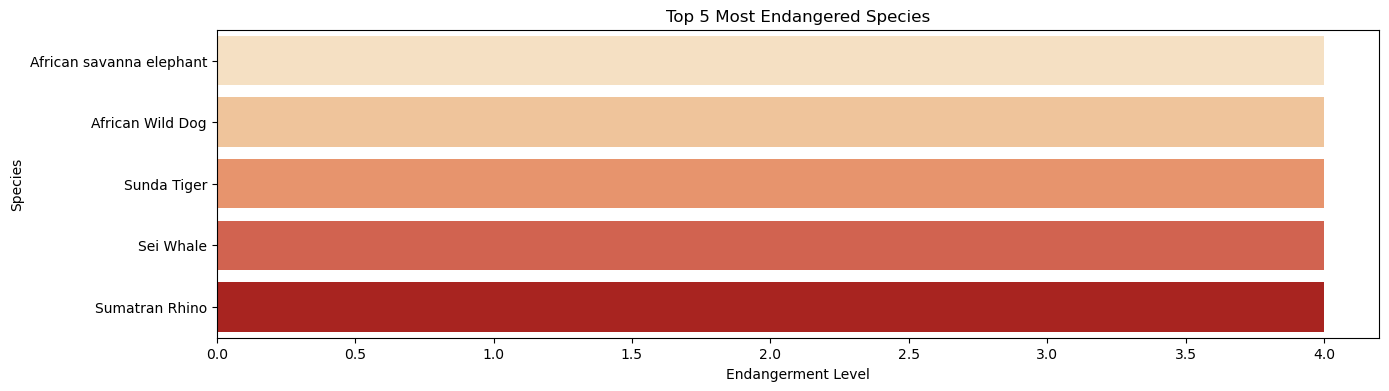

In [154]:
top_endangered_species = df.sort_values(by='Endangerment Level', ascending=False).head(5)
# Creating a horizontal bar plot
plt.figure(figsize=(15, 4))
sns.barplot(x='Endangerment Level', y='Common Name', data=top_endangered_species, palette="OrRd")
plt.title('Top 5 Most Endangered Species')
plt.xlabel('Endangerment Level')
plt.ylabel('Species')
plt.show()

#### Species Count by Conservation Status and Location

<Figure size 2000x500 with 0 Axes>

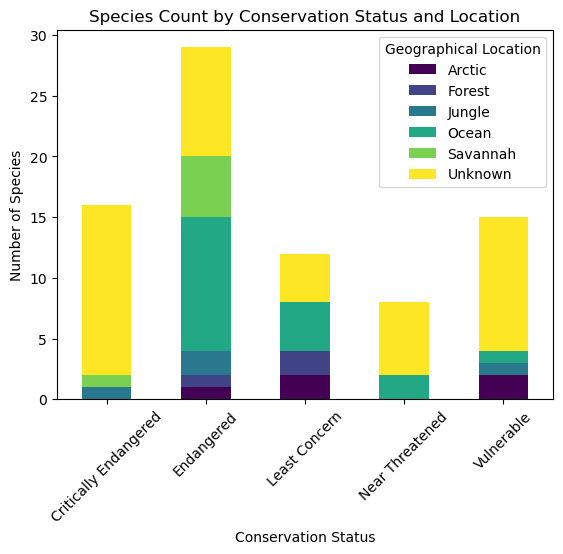

In [149]:
status_location_counts = wildlife_df.groupby(['Conservation Status', 'Geographical Location']).size().unstack()

plt.figure(figsize=(20, 5))
status_location_counts.plot(kind='bar', stacked=True, colormap="viridis")
plt.title('Species Count by Conservation Status and Location')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()